In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
import time

### Loading Audio

In [2]:
full_clip_file_path = 'full_clip.wav'
partial_clip_file_path = 'partial_clip.wav'

In [10]:
samples, sampling_rate = librosa.load(full_clip_file_path, sr=None, mono=True, offset=0.0, duration=None)

len(samples), sampling_rate

(3759609, 44100)

### Duration

In [7]:
duration_of_sound = len(samples) / sampling_rate
print(duration_of_sound, " seconds")

85.25190476190477  seconds


### Visualizing Audio

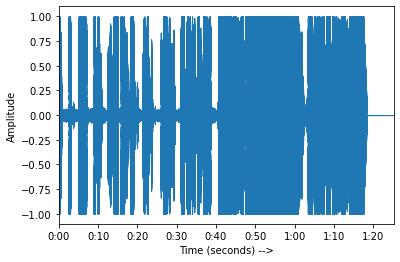

In [12]:
from librosa import display
plt.figure()
librosa.display.waveplot(y=samples, sr = sampling_rate)
plt.xlabel("Time (seconds) -->")
plt.ylabel("Amplitude")
plt.show()

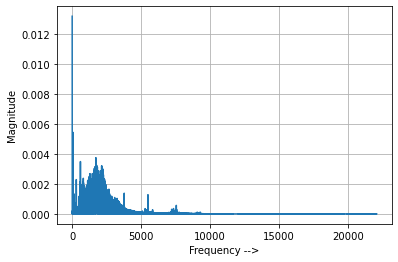

In [28]:
import scipy
def fft_plot(audio, sampling_rate):
    n = len(audio)
    T = 1/sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0,1.0/(2.0*T), n//2)
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
    plt.grid()
    plt.xlabel("Frequency -->")
    plt.ylabel('Magnitude')
    return plt.show()

fft_plot(samples, sampling_rate)

# Audio Search

In [4]:
full_clip_duration = librosa.get_duration(filename=full_clip_file_path)
partial_clip_duration = librosa.get_duration(filename=partial_clip_file_path)

partial_audio, sampling_rate = librosa.load(partial_clip_file_path, sr=None, mono=True, offset=0.0, duration=None)

partial_fft = scipy.fft(partial_audio)

def get_variance(a, b):
    if len(a) != len(b):
        return false
    output = 0
    for i in range(1000):
        output += np.abs(np.abs(a[i])-np.abs(b[i]))
    return output

min_variance = float('inf')
time_pos = -1
tic = time.perf_counter()
for i in range(0,round(full_clip_duration-partial_clip_duration)):
    full_audio, sampling_rate = librosa.load(full_clip_file_path, sr=None, mono=True, offset=i, duration=partial_clip_duration)
    full_fft = scipy.fft(full_audio)
    variance = get_variance(partial_fft, full_fft)
    if variance < min_variance:
        time_pos = i
        min_variance = variance
toc = time.perf_counter()

print('The partial clip occurs {} seconds into the full clip'.format(time_pos))
print(f"The audio search took {toc - tic:0.4f} seconds")

<ipython-input-4-f0c2ae61e4a6>:6: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  partial_fft = scipy.fft(partial_audio)
<ipython-input-4-f0c2ae61e4a6>:21: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  full_fft = scipy.fft(full_audio)


The partial clip occurs 16 seconds into the full clip
The audio search took 7.8048 seconds
